In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Label: 7


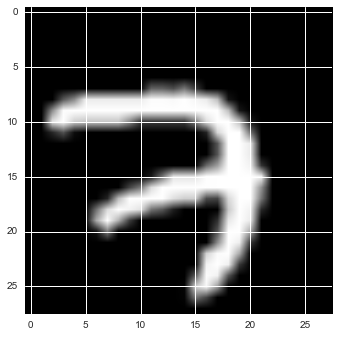

In [13]:
plt.imshow(mnist.train.images[0].reshape(28,28),cmap='gray')
print 'Label: {}'.format(np.argmax(mnist.train.labels[0]))

In [14]:
## Creating a placeholder for image vector
x = tf.placeholder(tf.float32,[None,784])

In [15]:
## For parameters we use model variables as they can be changed during computation
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([1,10]))

In [16]:
## Creating the model
y = tf.nn.softmax(tf.matmul(x,W) + b)

In [17]:
## Creating placeholder for labels
y_ = tf.placeholder(tf.float32,[None,10])

In [20]:
## Evaluating the cross entropy function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))

In [21]:
## Training with Gradient Descent
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [24]:
## Creating an operation to initialize the variables
init = tf.initialize_all_variables()

In [25]:
sess = tf.Session()
sess.run(init)

In [26]:
for i in range(1000):
    batch_xs,batch_ys = mnist.train.next_batch(100)
    sess.run(train_step,feed_dict={x:batch_xs,y_:batch_ys})

In [27]:
## Evaluating the model
correct_predictions = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [28]:
accuracy = tf.reduce_mean(tf.cast(correct_predictions,tf.float32))

In [33]:
print 'Accuracy: {}%'.format(round(sess.run(accuracy,{x:mnist.test.images,y_:mnist.test.labels})*100),2)

Accuracy: 92.0%
